#Data Preparing


In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("drive/MyDrive/BDC_ASS/data.csv")
df1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,NHHK,MAMH,TENMHVN,MANH,F_TO,F_MAKH,F_TENLOP,F_MANG,F_TENNGVN,...,TILEBT,BTLDA,TILEBTLDA,TN,TILETN,THI,TILETHI,TKET,F_DIEM1,F_DIEM2
0,0,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,3.0,60.0,4.0,0.0,0.0
1,1,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,5.0,60.0,6.0,0.0,0.0
2,2,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,8.5,60.0,8.5,0.0,0.0
3,3,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,4.0,60.0,4.0,0.0,0.0
4,4,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,9.5,60.0,9.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470304,470304,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,7.5,30.0,10.0,30.0,2.0,40.0,2.0,0.0,0.0
470305,470305,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,8.5,30.0,10.0,30.0,5.5,40.0,8.0,0.0,0.0
470306,470306,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,8.5,30.0,9.0,30.0,3.0,40.0,6.5,0.0,0.0
470307,470307,162,CO1003,Nhập môn về lập trình,L06,A,XD,XD16KT,KTR,Kiến Trúc,...,0.0,7.5,30.0,9.0,30.0,2.5,40.0,2.5,0.0,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1.columns

Index(['Unnamed: 0', 'NHHK', 'MAMH', 'TENMHVN', 'MANH', 'F_TO', 'F_MAKH',
       'F_TENLOP', 'F_MANG', 'F_TENNGVN', 'MASV', 'F_HOLOTVN', 'F_TENVN', 'KT',
       'TILEKT', 'BT', 'TILEBT', 'BTLDA', 'TILEBTLDA', 'TN', 'TILETN', 'THI',
       'TILETHI', 'TKET', 'F_DIEM1', 'F_DIEM2'],
      dtype='object')

In [ ]:
df = df1[["MASV","NHHK","MAMH","F_MAKH",'KT',\
       'BT', 'BTLDA', 'TN', 'THI',\
       'TKET', 'F_DIEM1', 'F_DIEM2']].copy()
df.MAMH.astype(str)

0           1001
1           1001
2           1001
3           1001
4           1001
           ...  
470304    CO1003
470305    CO1003
470306    CO1003
470307    CO1003
470308    CO1003
Name: MAMH, Length: 470309, dtype: object

In [ ]:
data = df.loc[(df["F_MAKH"] == "CK")]
# data = df.loc[(df["F_MANG"] == "CKI")]
size = data.shape[0]


students = list(set(data.MASV))

courses = [ i for i  in set(data.MAMH) if type(i) is str]

semesters = list(set(data.NHHK))

course_segment = []

for course in courses:
  df_temp= data[(data.MAMH == course)]
  if len(df_temp):
    course_segment.append(df_temp)
len(course_segment)


360

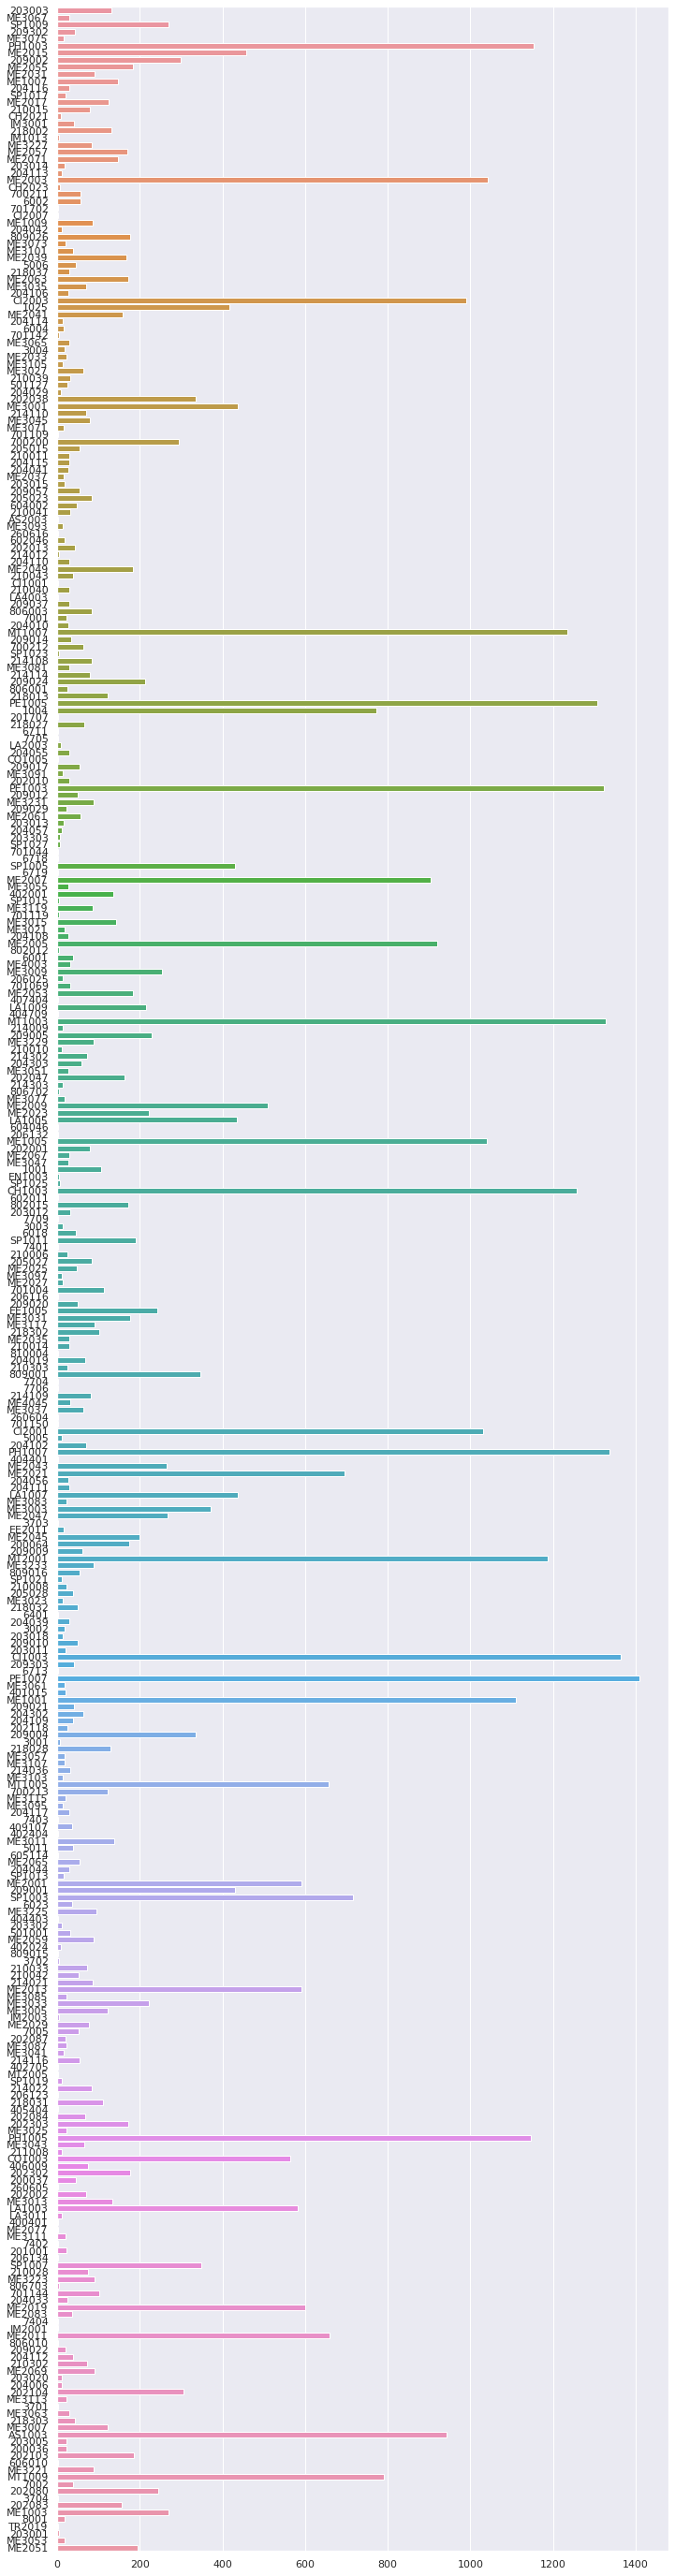

In [ ]:
import seaborn as sns
x = []
y = []
for course in course_segment:
  x.append(course.MAMH.values[0])
  y.append(course.shape[0])
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,50)})
ax = sns.barplot(x=y, y=x)

In [ ]:
student_rec = {}
for student in students:
  student_rec[student]=[]

for student in students:
  for course in course_segment:
    if student in course.MASV.values:
      student_rec[student].append(course['TKET'][course['MASV'] == student].values[0])
    else:
      student_rec[student].append(-1)


In [25]:
df_ = pd.DataFrame()
df_size = len(course_segment)+1
df_ = pd.DataFrame(columns=range(df_size))
for key in student_rec:
  value = student_rec[int(key)]
  df_.loc[len(df_)]=[int(key)]+value
df_
  

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,35700740.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,59187208.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,63561740.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,65421330.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,6.5,...,-1.0,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,8.5
4,61276181.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,80109557.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.5,-1.0,...,-1.0,6.5,-1.0,7.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3743,1359866.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.5,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3744,33791996.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3745,30957565.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


##Save Dataframe

In [ ]:
df_.to_csv("drive/MyDrive/BDC_ASS/Vinh/TK_CK.csv")

In [ ]:
data_ = pd.read_csv("drive/MyDrive/BDC_ASS/Vinh/TK_CK.csv")

data = data_.copy()
del data['0']
data.replace(-1,0,inplace=True)
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.5,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.5
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,3742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,...,0.0,6.5,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0
3743,3743,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3744,3744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3745,3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#KMeans

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline
wcss = []
kValueRange = range(1,12)
for k in kValueRange:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(data)
    wcss.append(km.inertia_)
plt.xlabel('Value of K')
plt.ylabel('Sum of squared distances error')
plt.plot(kValueRange,wcss)

In [ ]:
for i in range(1,len(wcss)):
    val= wcss[i]- wcss[i-1]
    print(("%d to %d is %d")%(i-1, i,-val))

In [ ]:
# After k=5, value of squared error is decreasing.
# Hence, we are going to use k=5
km=KMeans(n_clusters=5, n_init=20)
km.fit(data)

In [ ]:
print("Size of km.labels_ : ",km.labels_.size)
print("Count of values :")
pd.Series(km.labels_).value_counts()

In [ ]:
km.cluster_centers_

In [ ]:
#plotting datapoints
colors= ['red', 'cyan', 'yellow', 'orange', 'violet']
labels= ['Cluster1' ,'Cluster2', 'Cluster3', 'Cluster4','Cluster5']

colorLabel= [colors[km.labels_[i]] for i in range(len(km.labels_)) ]

plt.figure(figsize=(8,5))
plt.scatter(data['TKET'], data['THI'], color= colorLabel,marker='o')

#plotting centres of clusters
plt.scatter(km.cluster_centers_[:, 4], km.cluster_centers_[:, 5], s=100, c='black', marker='o')
plt.title("K-Means Clustering")
plt.xlabel("TONGKET")
plt.ylabel('THI')
plt.show()

In [ ]:
cluster_map = pd.DataFrame()

cluster_map['cluster'] = km.labels_
cluster_map

# PCA & KMeans

##PCA
### Note that PCA is applied to continous value -> problem ? 
Solve with standard scaler

-> Can we use kernel PCA instead

-> The data have too many 0, so maybe affected the component?
https://stats.stackexchange.com/questions/178886/modelling-data-with-many-zeros-principal-component-analysis-vs-zero-inflated-m

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
seg_std = scaler.fit_transform(data)
seg_std

array([[-1.73158862, -0.16728695, -0.08798722, ..., -0.03264516,
        -0.06498825, -0.21316468],
       [-1.73066412, -0.16728695, -0.08798722, ..., -0.03264516,
        -0.06498825, -0.21316468],
       [-1.72973962, -0.16728695, -0.08798722, ..., -0.03264516,
        -0.06498825, -0.21316468],
       ...,
       [ 1.72973962, -0.16728695, -0.08798722, ..., -0.03264516,
        -0.06498825, -0.21316468],
       [ 1.73066412, -0.16728695, -0.08798722, ..., -0.03264516,
        -0.06498825, -0.21316468],
       [ 1.73158862, -0.16728695, -0.08798722, ..., -0.03264516,
        -0.06498825, -0.21316468]])

In [ ]:
pca = PCA()
pca.fit(seg_std)


PCA()

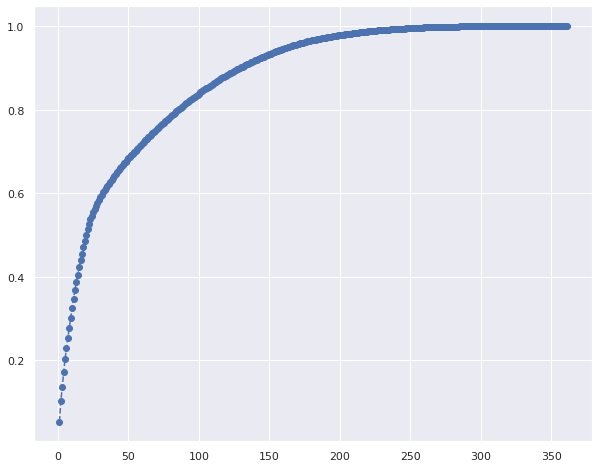

In [ ]:
pca.explained_variance_ratio_
plt.figure(figsize = (10,8))
plt.plot(range(1,data.shape[1]+1),pca.explained_variance_ratio_.cumsum(),marker="o",linestyle="--")


In [ ]:
n_component = 3
pca = PCA(n_components = n_component)
pca.fit(seg_std)

PCA(n_components=3)

In [ ]:
scores_pca=pca.transform(seg_std)
scores_pca

array([[-2.07746933,  1.0321493 , -0.2073204 ],
       [-1.91161543,  0.93574512, -0.2178295 ],
       [ 4.62417039, -6.63155475,  8.25025465],
       ...,
       [-6.47625473,  3.65576415,  2.14825145],
       [-1.92915248,  0.92259418, -0.24853731],
       [-0.21818252, -1.04974506, -3.34246507]])

## KMeans++

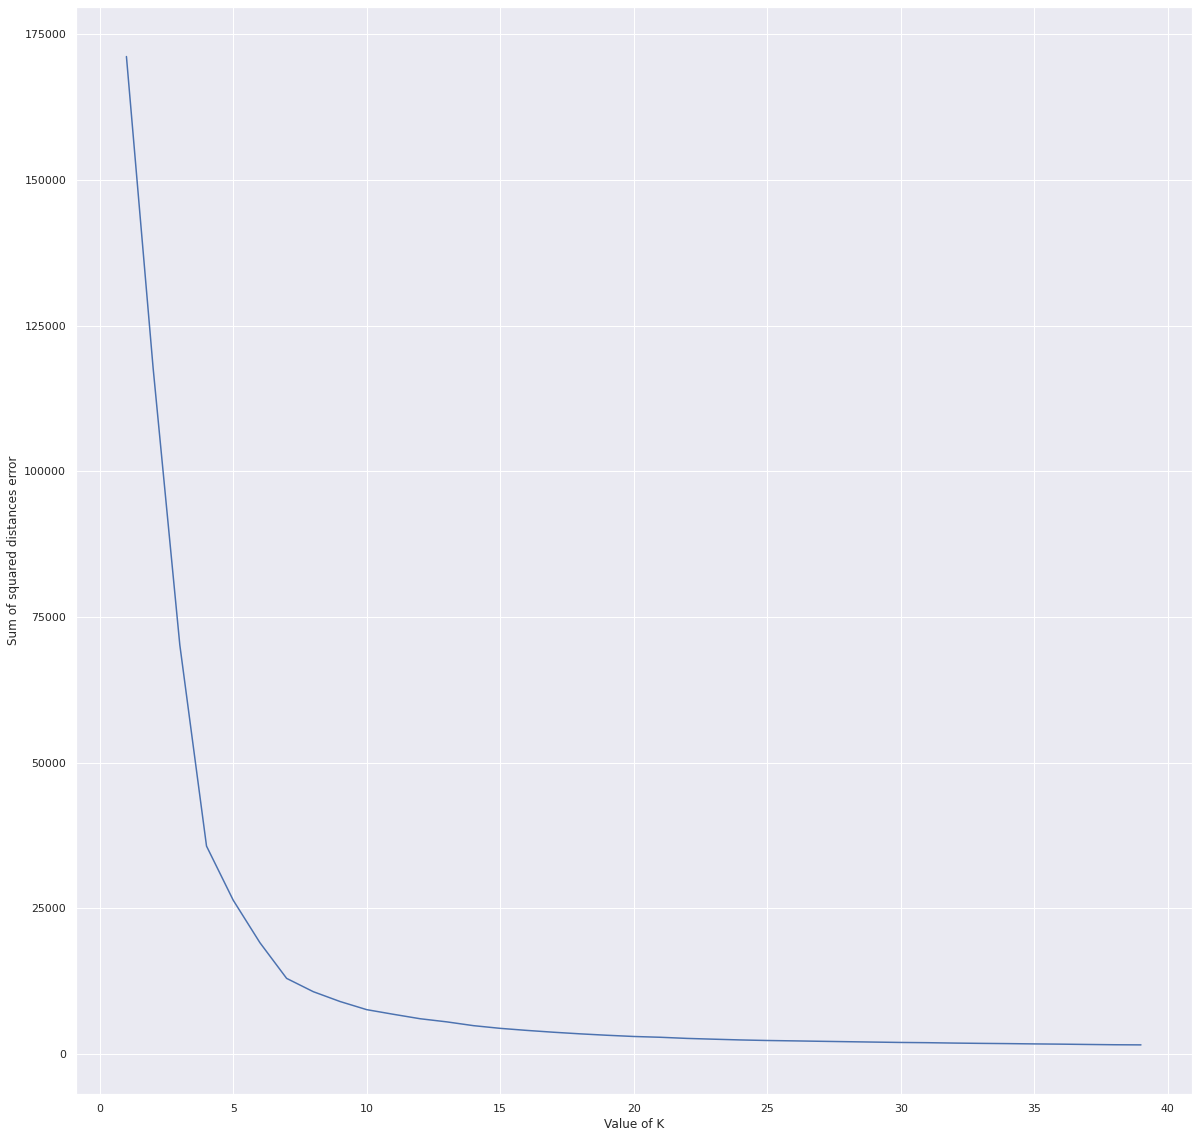

In [ ]:
wcss = []
kValueRange = range(1,40)
for k in kValueRange:
    km = KMeans(n_clusters=k, init="k-means++",random_state=42)
    km.fit(scores_pca)
    wcss.append(km.inertia_)
plt.figure(figsize=(20,20))
plt.xlabel('Value of K')
plt.ylabel('Sum of squared distances error')
plt.plot(kValueRange,wcss)

In [ ]:
n_cluster=7
kmeans_pca = KMeans(n_clusters = n_cluster, init = "k-means++", random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=7, random_state=42)

In [ ]:
print("Size of km.labels_ : ",kmeans_pca.labels_.size)
print("Count of values :")
pd.Series(kmeans_pca.labels_).value_counts()

Size of km.labels_ :  3747
Count of values :


0    1494
4     631
6     484
5     412
3     397
1     242
2      87
dtype: int64

In [ ]:
df_pca = pd.concat([data.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca.columns.values[-n_component:] = ["Component{}".format(i) for i in range(1,n_component+1)]
df_pca["Segment"]=kmeans_pca.labels_
df_pca

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,Component1,Component2,Component3,Segment
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.077469,1.032149,-0.207320,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.911615,0.935745,-0.217830,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.624170,-6.631555,8.250255,3
3,3,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.5,...,8.0,0.0,0.0,0.0,0.0,8.5,6.894888,3.065333,-2.974523,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.108824,0.092108,-1.579592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,3742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-5.521370,3.129369,1.562183,6
3743,3743,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.253417,-1.455801,-4.015173,4
3744,3744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-6.476255,3.655764,2.148251,6
3745,3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.929152,0.922594,-0.248537,0


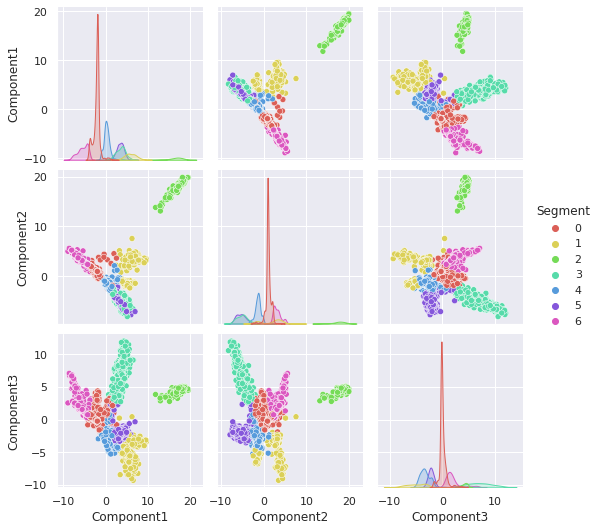

In [ ]:
visualize = pd.DataFrame(data=df_pca, columns=["Component"+str(i) for i in range(1,n_component+1)]+["Segment"])

sns.pairplot(data=visualize,hue = 'Segment',vars=["Component"+str(i) for i in range(1,n_component+1)],palette = sns.color_palette("hls", n_cluster))

In [26]:
df_["Segment"] = df_pca["Segment"]

In [28]:
df_

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,Segment
0,35700740.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,59187208.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,63561740.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
3,65421330.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,6.5,...,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,8.5,1
4,61276181.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,80109557.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7.5,-1.0,...,6.5,-1.0,7.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6
3743,1359866.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.5,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
3744,33791996.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6
3745,30957565.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0


In [ ]:

cluster1 = df_pca[df_pca["Segment"]==1]
cluster1


,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,Component1,Component2,Component3,Segment
3,3,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.5,...,8.0,0.0,0.0,0.0,0.0,8.5,6.894888,3.065333,-2.974523,1
9,9,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.633647,3.801557,-4.701553,1
32,32,0.0,6.5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.5,0.0,0.0,0.0,0.0,0.0,5.190243,3.661340,-6.655091,1
35,35,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,...,7.5,0.0,0.0,0.0,0.0,0.0,4.721434,-2.026005,-4.608010,1
50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,5.523007,2.709956,-7.312347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,3658,0.0,0.0,0.0,0.0,0.0,7.5,0.0,0.0,8.5,...,8.5,0.0,0.0,0.0,0.0,9.5,9.114781,2.678765,-4.004034,1
3663,3663,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,...,7.5,0.0,0.0,0.0,0.0,0.0,3.941535,-1.081869,-5.184224,1
3700,3700,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,...,8.5,0.0,0.0,0.0,0.0,0.0,5.096458,-1.961133,-4.691651,1
3716,3716,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,...,6.5,0.0,0.0,0.0,0.0,0.0,5.898686,3.844437,-5.477079,1


## Môn học ở các cluster là gi

## Phân tích điểm trung bình của các sinh viên ở từng cluster và so sánh các cluster với nhau